Predictions: [ 1.  1.  1. -1. -1. -1.]
Actual Labels: [ 1  1  1 -1 -1 -1]
Weights: [0.22267249 0.5833009 ]
Bias: -1.8400000000000014
Accuracy: 1.0


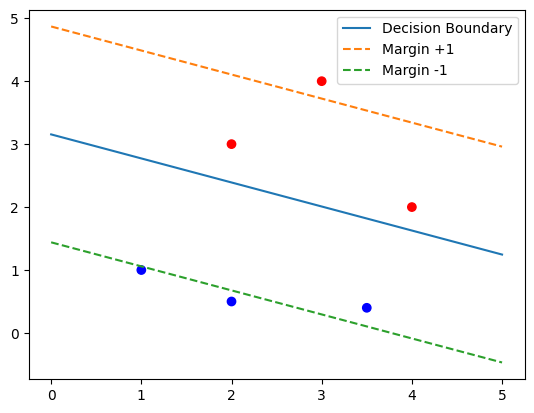

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([
    [2, 3],
    [3, 4],
    [4, 2],
    [1, 1],
    [2, 0.5],
    [3.5, 0.4]
])

y = np.array([1, 1, 1, -1, -1, -1]) 

class LinearSVM:
    def __init__(self, lr=0.001, C=1.0, epochs=1000):
        self.lr = lr
        self.C = C
        self.epochs = epochs
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for epoch in range(self.epochs):
            for i, x in enumerate(X):
                condition = y[i] * (np.dot(x, self.w) + self.b)
                
                if condition >= 1:
                    self.w -= self.lr * (self.w)
                else:
                    self.w -= self.lr * (self.w - self.C * y[i] * x)
                    self.b += self.lr * self.C * y[i]
    
    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

model = LinearSVM(lr=0.01, C=1.0, epochs=2000)
model.fit(X, y)
preds = model.predict(X)
print("Predictions:", preds)
print("Actual Labels:", y)
print("Weights:", model.w)
print("Bias:", model.b)

accuracy = np.mean(preds == y)
print("Accuracy:", accuracy)

def plot_svm(X, y, model):
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')

    # Decision boundary line: w1*x + w2*y + b = 0
    x_vals = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
    y_vals = -(model.w[0] * x_vals + model.b) / model.w[1]

    # Margin lines: ±1
    margin_pos = -(model.w[0] * x_vals + model.b - 1) / model.w[1]
    margin_neg = -(model.w[0] * x_vals + model.b + 1) / model.w[1]

    plt.plot(x_vals, y_vals, label='Decision Boundary')
    plt.plot(x_vals, margin_pos, '--', label='Margin +1')
    plt.plot(x_vals, margin_neg, '--', label='Margin -1')

    plt.legend()
    plt.show()


plot_svm(X, y, model)
